In [172]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [173]:
#Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from wordcloud import WordCloud
import plotly.express as px
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [174]:
#Loading the dataset
movies = pd.read_csv('/content/drive/MyDrive/rotten_tomatoes_movies.csv') # rotten_tomatoes_movies.csv stored as movies
reviews = pd.read_csv('/content/drive/MyDrive/rotten_tomatoes_movie_reviews.csv') # rotten_tomatoes_movie_reviews.csv stored as reviews


In [175]:
#Exploring the dataset
movies.head() # Display the first 5 rows of the reviews
movies.tail() # Display the last 5 rows of the movies
reviews.head() # Display the first 5 rows of the reviews
reviews.tail() # Display the last 5 rows of the reviews
movies.shape# Get number of rows and columns of movies
reviews.shape# Get number of rows and columns of movies
movies.info() # view the null count and column type of movies
reviews.info() # view the null count and column type of reviews
movies.nunique() # Count the number of unique values in each column of movies
reviews.nunique() # Count the number of unique values in each column of reviews
movies.isnull().sum() # Get count of missing values in the dataset movies
reviews.isnull().sum() # Get count of missing values in the dataset reviews

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143258 entries, 0 to 143257
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    143258 non-null  object 
 1   title                 142891 non-null  object 
 2   audienceScore         73248 non-null   float64
 3   tomatoMeter           33877 non-null   float64
 4   rating                13991 non-null   object 
 5   ratingContents        13991 non-null   object 
 6   releaseDateTheaters   30773 non-null   object 
 7   releaseDateStreaming  79420 non-null   object 
 8   runtimeMinutes        129431 non-null  float64
 9   genre                 132175 non-null  object 
 10  originalLanguage      129400 non-null  object 
 11  director              139064 non-null  object 
 12  writer                90116 non-null   object 
 13  boxOffice             14743 non-null   object 
 14  distributor           23005 non-null   object 
 15  

id                     0
reviewId               0
creationDate           0
criticName             0
isTopCritic            0
originalScore     435218
reviewState            0
publicatioName         0
reviewText         69225
scoreSentiment         0
reviewUrl         210925
dtype: int64

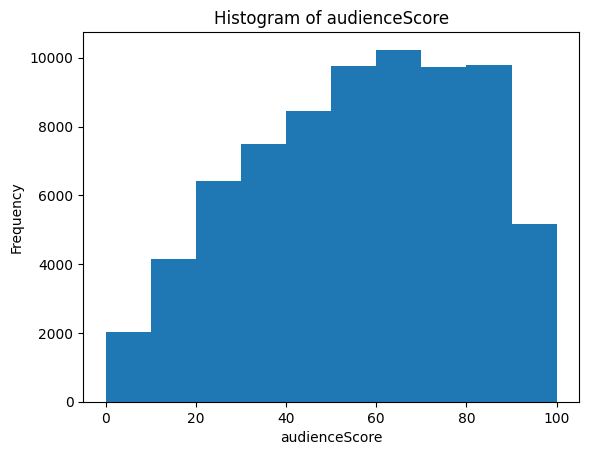

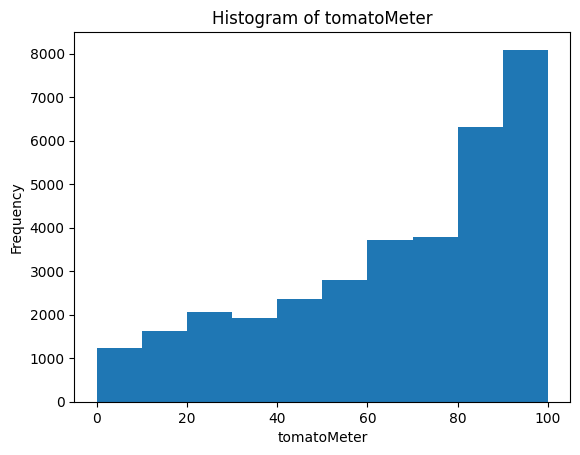

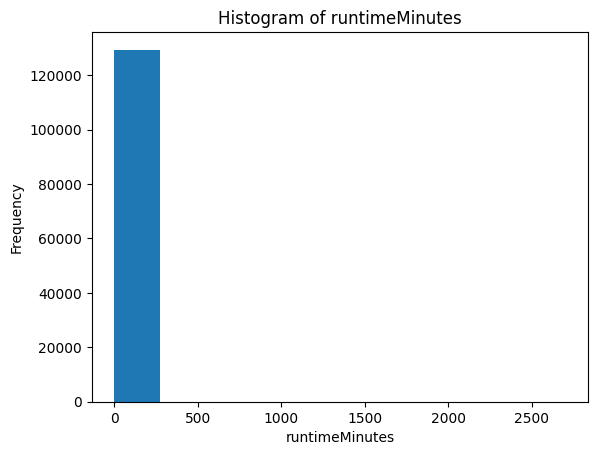

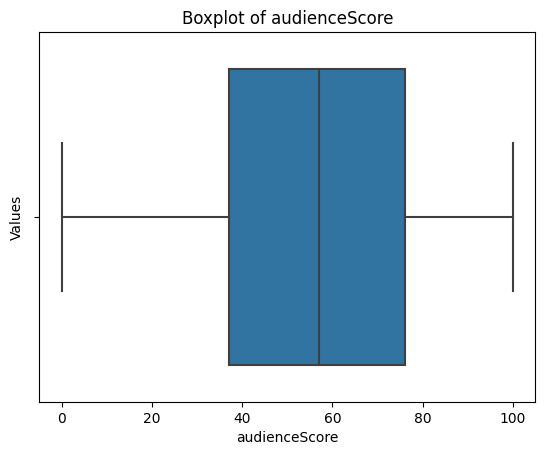

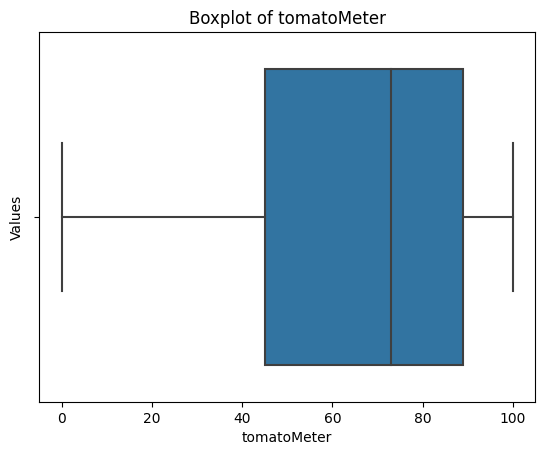

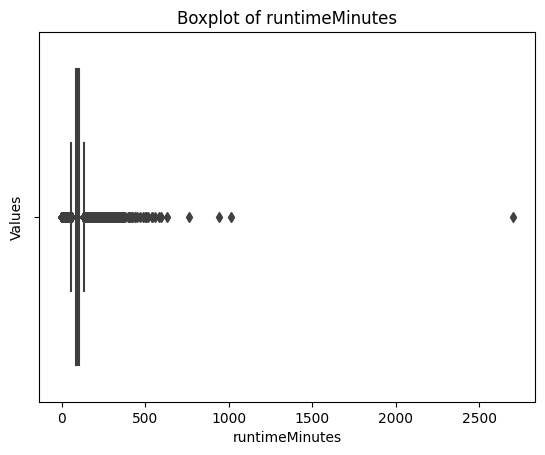

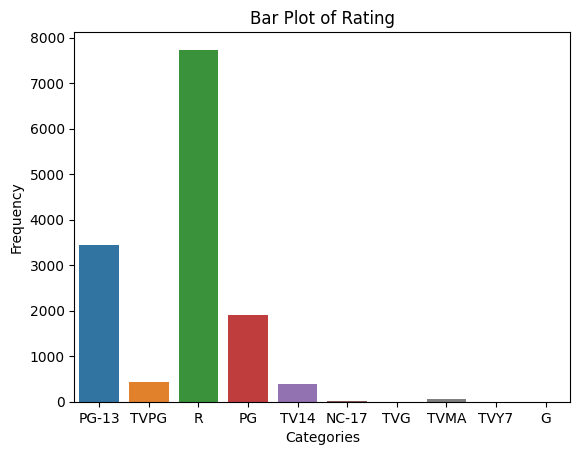

In [176]:
###EDA of the dataset

##Univariate Analysis

# Plot histogram of audienceScore column of movies
plt.hist(movies['audienceScore'])
plt.xlabel('audienceScore')
plt.ylabel('Frequency')
plt.title('Histogram of audienceScore')
plt.show()

# Plot histogram of tomatoMeter column of movies
plt.hist(movies['tomatoMeter'])
plt.xlabel('tomatoMeter')
plt.ylabel('Frequency')
plt.title('Histogram of tomatoMeter')
plt.show()

# Plot histogram of runtimeMinutes column of movies
plt.hist(movies['runtimeMinutes'])
plt.xlabel('runtimeMinutes')
plt.ylabel('Frequency')
plt.title('Histogram of runtimeMinutes')
plt.show()

# Create boxplot of a audienceScore column of movies
sns.boxplot(x=movies['audienceScore'])
plt.ylabel('Values')
plt.title('Boxplot of audienceScore')
plt.show()

# Create boxplot of a tomatoMeter column of movies
sns.boxplot(x=movies['tomatoMeter'])
plt.ylabel('Values')
plt.title('Boxplot of tomatoMeter')
plt.show()

# Create boxplot of a runtimeMinutes column of movies
sns.boxplot(x=movies['runtimeMinutes'])
plt.ylabel('Values')
plt.title('Boxplot of runtimeMinutes')
plt.show()

# Create bar plot for categorical column rating
sns.countplot(x='rating', data=movies)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Bar Plot of Rating')
plt.show()

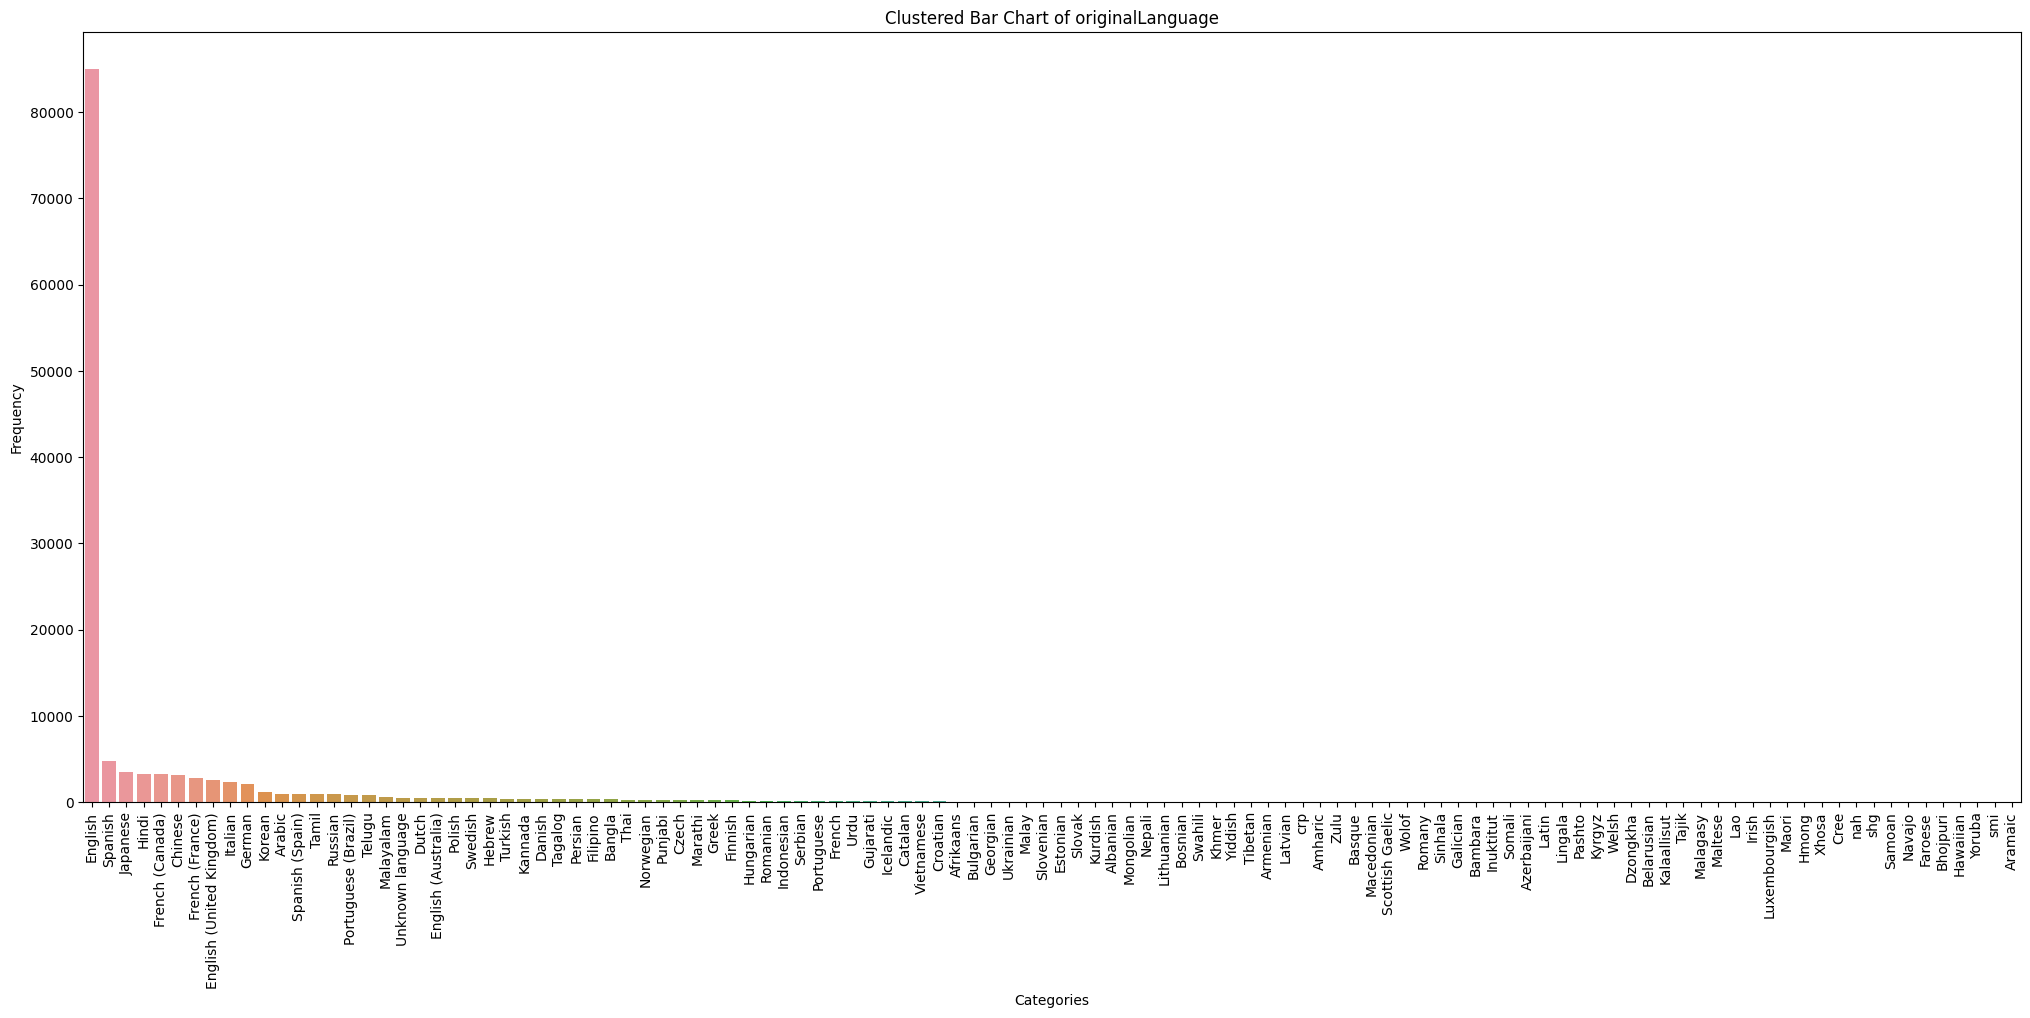

In [177]:
# Create clustered bar plot for OriginalLanguage
# Count the frequency of each category
language_counts = movies['originalLanguage'].value_counts()

# Reset the index of the counts
language_counts = language_counts.reset_index()

# Rename the columns
language_counts.columns = ['originalLanguage', 'frequency']

# Plot the clustered bar chart with increased X-axis scale
plt.figure(figsize=(25, 10))
sns.barplot(x='originalLanguage', y='frequency', data=language_counts)
plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('Clustered Bar Chart of originalLanguage')
plt.xticks(rotation=90)
plt.show()

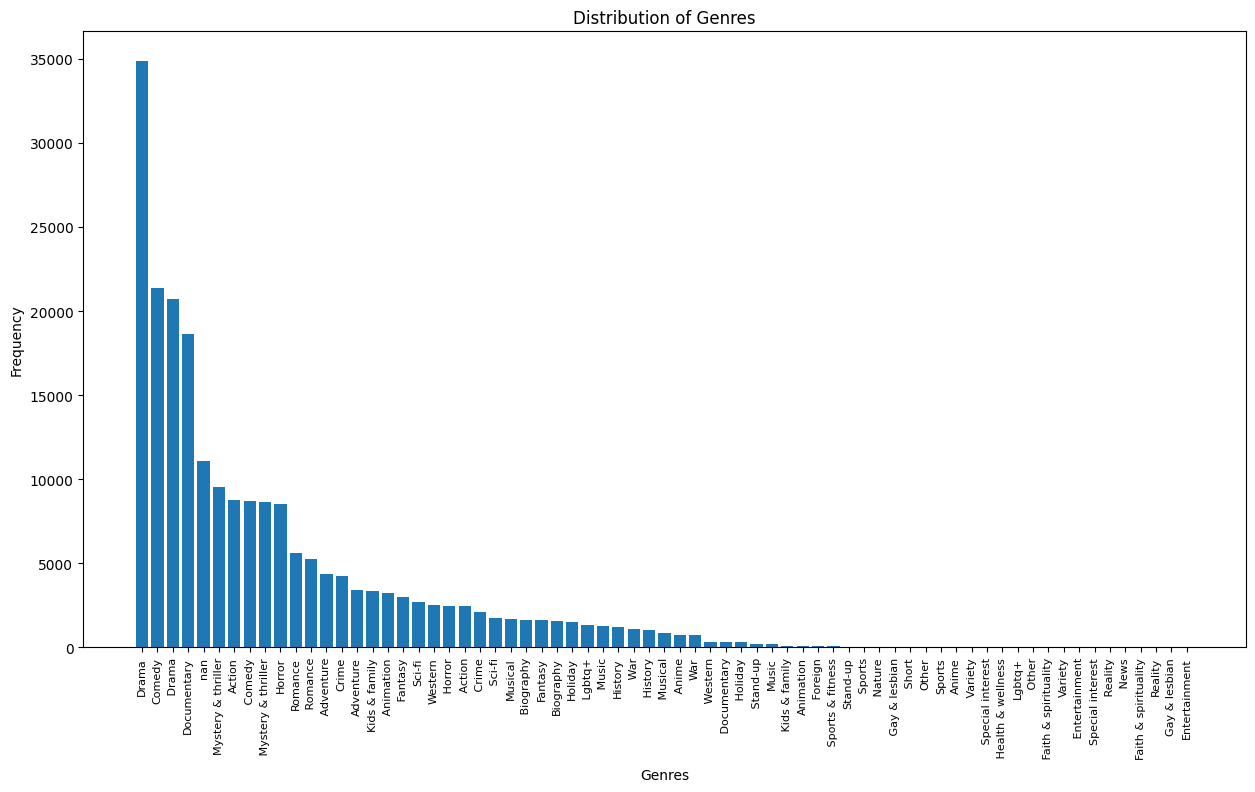

In [178]:
# Create a series where each element is a list of genres for each movie
movies['genre'] = movies['genre'].astype(str)
genres = movies['genre'].str.split(',')

# Create an empty dictionary to hold the frequency count of each genre
genre_counts = {}

# Loop through the series and count the frequency of each genre
for genre_list in genres:
    for genre in genre_list:
        if genre in genre_counts:
            genre_counts[genre] += 1
        else:
            genre_counts[genre] = 1

# Convert the dictionary to a DataFrame for easier plotting
genre_counts_df = pd.DataFrame(list(genre_counts.items()), columns=['Genre', 'Count'])

# Sort the DataFrame by Count
genre_counts_df = genre_counts_df.sort_values(by='Count', ascending=False)

# Plot the frequencies
plt.figure(figsize=(15,8))
plt.bar(genre_counts_df['Genre'], genre_counts_df['Count'])
plt.title('Distribution of Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=90, fontsize=8) # Rotate the labels and decrease the font size
plt.show()

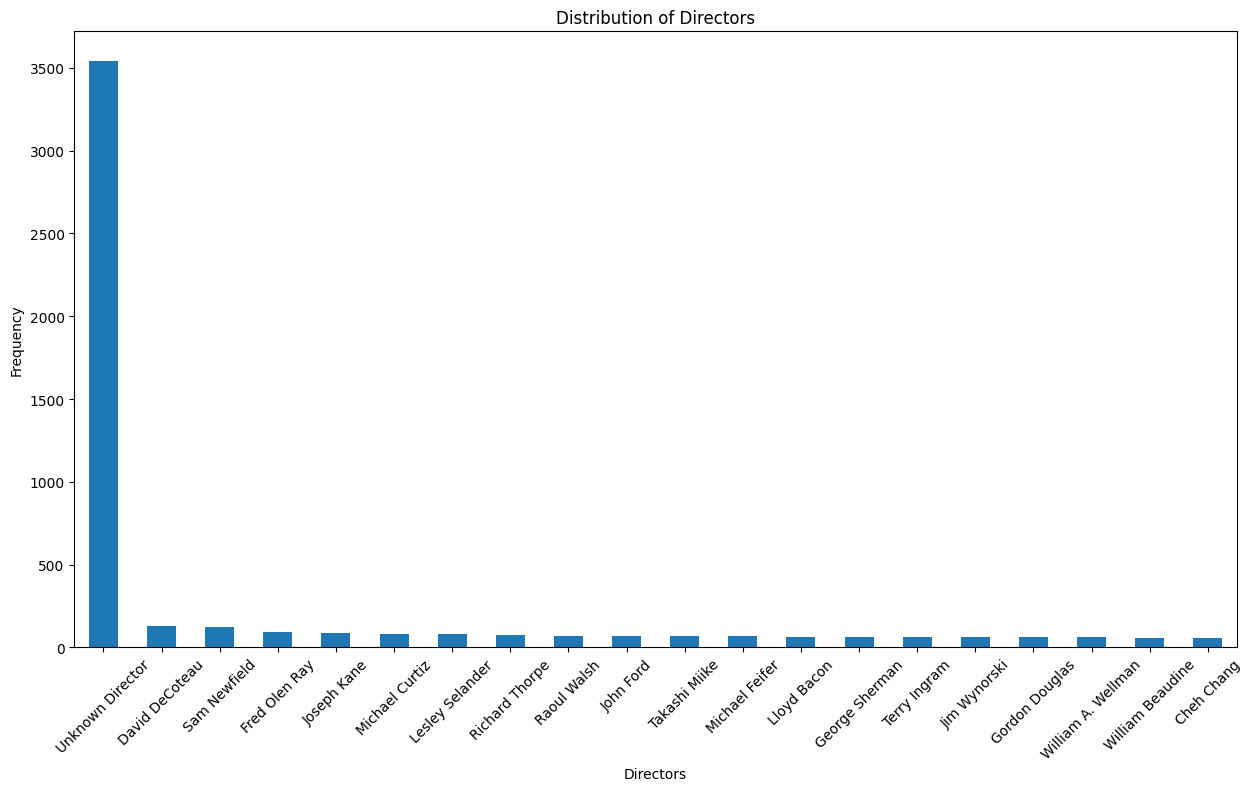

In [179]:
# Calculate director frequencies
director_counts = movies['director'].value_counts()

# Ploting top 20 directors
top_directors = director_counts[:20]

# Ploting frequencies
plt.figure(figsize=(15,8))
top_directors.plot(kind='bar')
plt.title('Distribution of Directors')
plt.xlabel('Directors')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

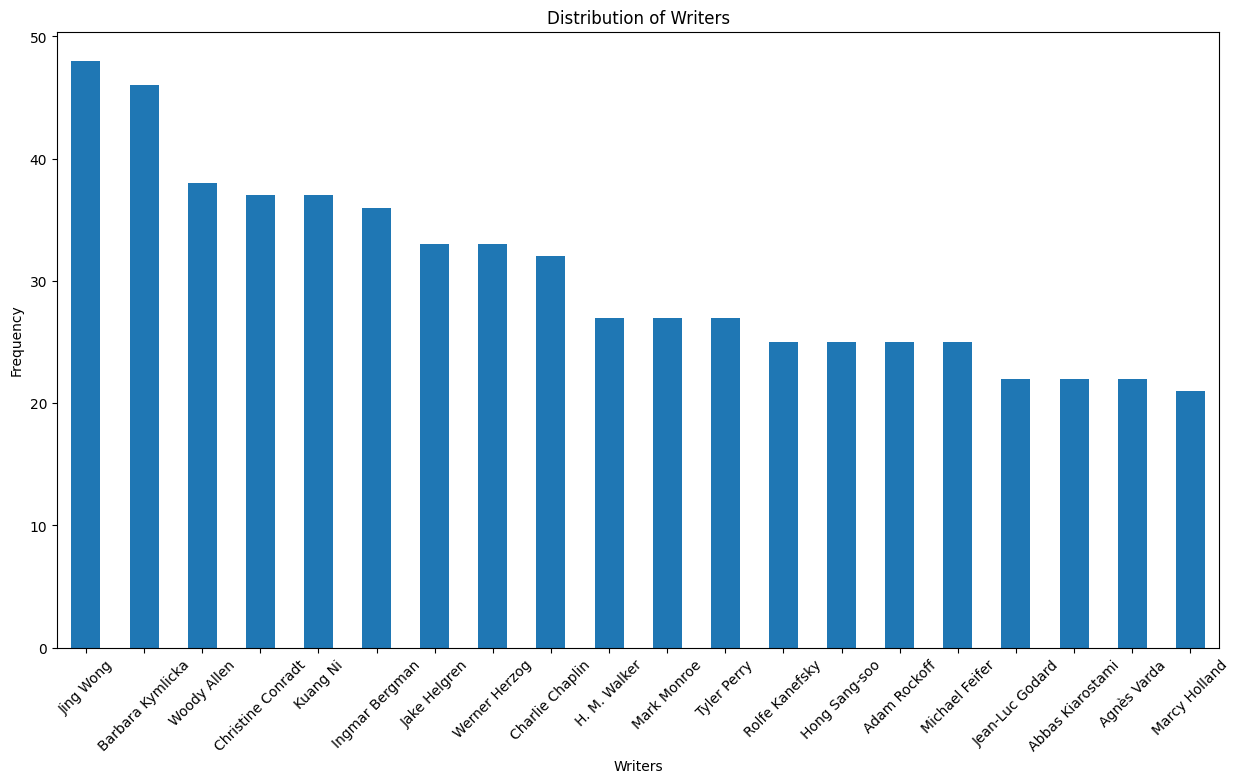

In [180]:
# Calculate writer frequencies
writer_counts = movies['writer'].value_counts()

# Ploting top 20 writers
top_writers = writer_counts[:20]

# Plot the frequencies
plt.figure(figsize=(15,8))
top_writers.plot(kind='bar')
plt.title('Distribution of Writers')
plt.xlabel('Writers')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

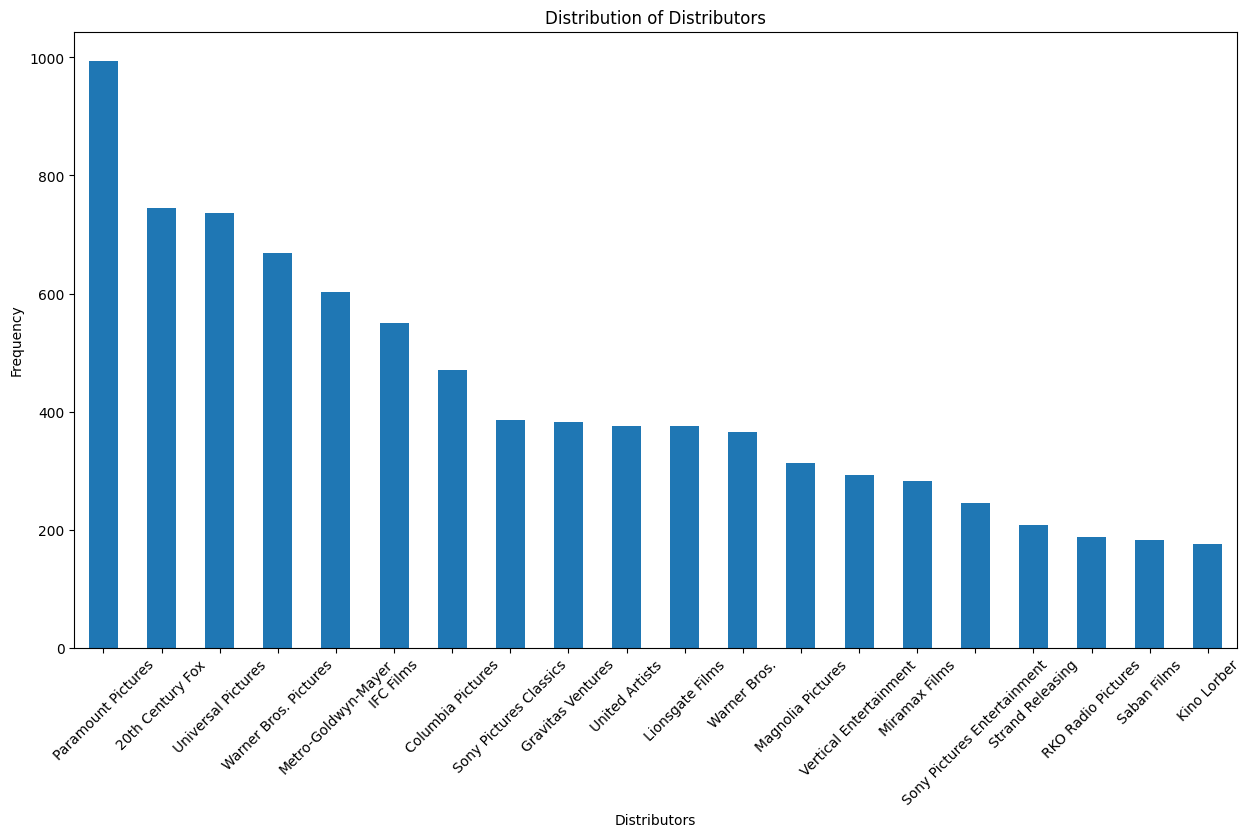

In [181]:
# Calculate distributor frequencies
distributor_counts = movies['distributor'].value_counts()

# Ploting top 20 distributors
top_distributors = distributor_counts[:20]

# Plot the frequencies
plt.figure(figsize=(15,8))
top_distributors.plot(kind='bar')
plt.title('Distribution of Distributors')
plt.xlabel('Distributors')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

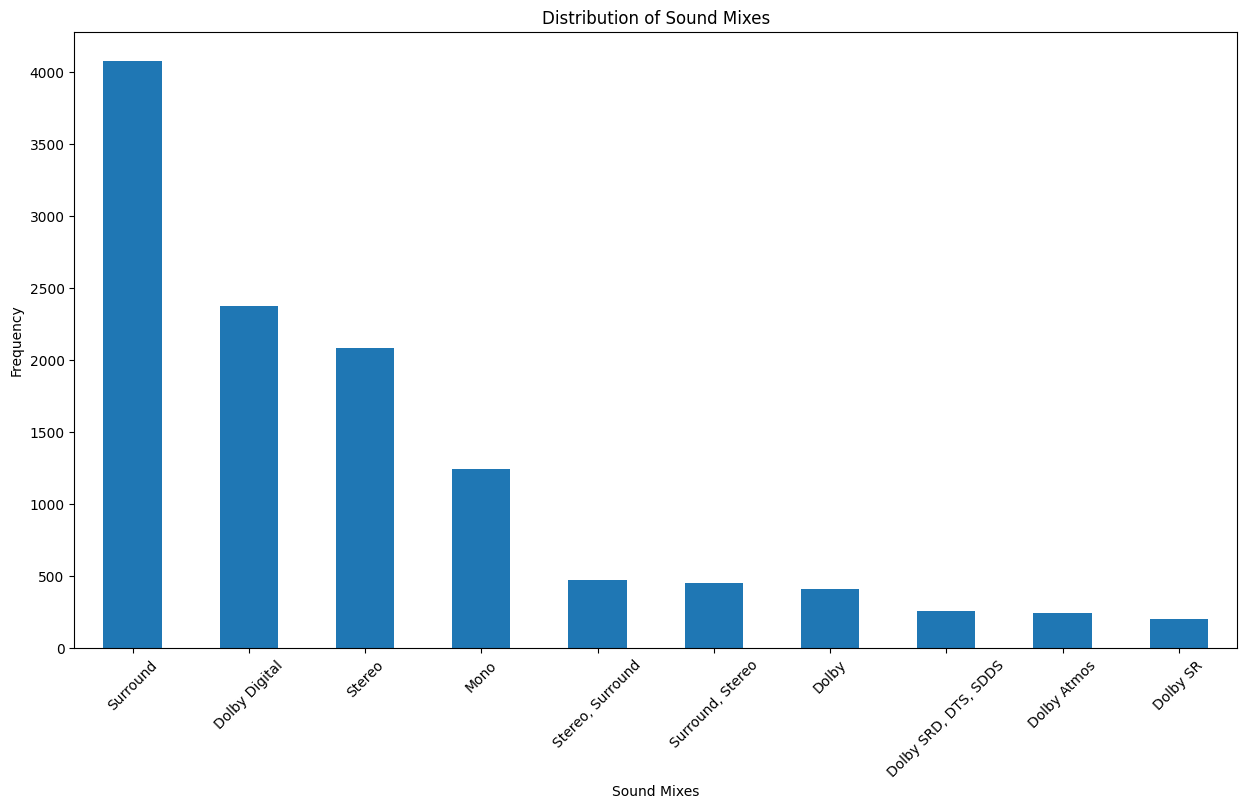

In [182]:
# Calculate sound mix frequencies
sound_mix_counts = movies['soundMix'].value_counts()

# Ploting top 20 sound mixes
top_sound_mixes = sound_mix_counts[:10]

# Plot the frequencies
plt.figure(figsize=(15,8))
top_sound_mixes.plot(kind='bar')
plt.title('Distribution of Sound Mixes')
plt.xlabel('Sound Mixes')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

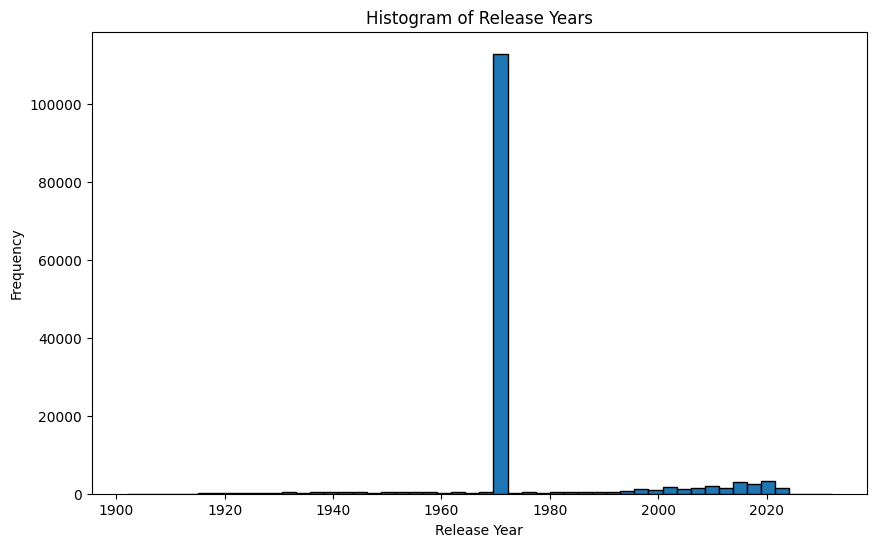

In [183]:
# create histogram for releaseDateTheaters

# Replace null values with zero
movies['releaseDateTheaters'].fillna(0, inplace=True)

# Convert the 'releaseDateTheaters' column to datetime format
movies['releaseDateTheaters'] = pd.to_datetime(movies['releaseDateTheaters'])

# Extract the release years
release_years = movies['releaseDateTheaters'].dt.year

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(release_years, bins=50, edgecolor='black')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.title('Histogram of Release Years')
plt.show()

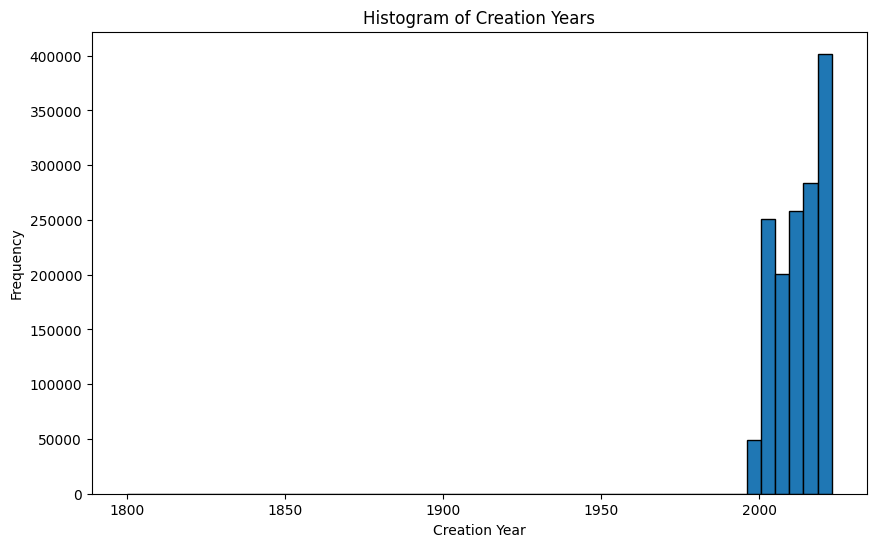

In [184]:
# create histogram for creationDate

# Convert the 'creationDate' column to datetime format
reviews['creationDate'] = pd.to_datetime(reviews['creationDate'])

# Extract the creation years
creation_years = reviews['creationDate'].dt.year

# Generate bins and frequencies
bins, frequencies = np.histogram(creation_years, bins=50)
# Ploting the histogram
plt.figure(figsize=(10, 6))
plt.hist(creation_years, bins=50, edgecolor='black')
plt.xlabel('Creation Year')
plt.ylabel('Frequency')
plt.title('Histogram of Creation Years')
plt.show()

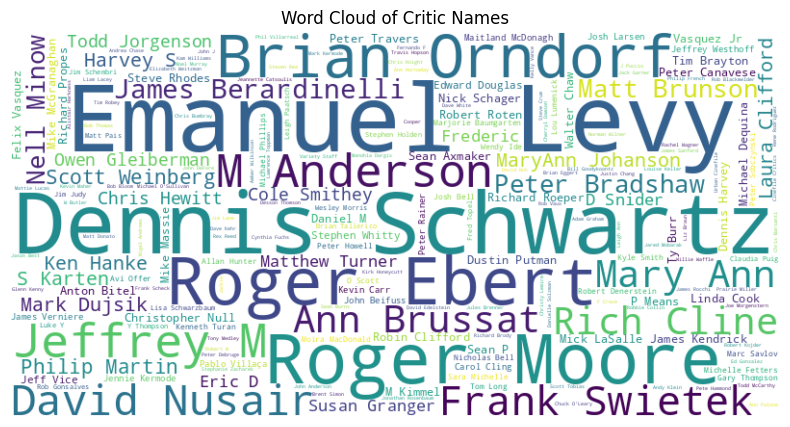

In [185]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert 'criticName' column to strings
reviews['criticName'] = reviews['criticName'].astype(str)

# Concatenate all the critic names into a single string
critic_name_text = ' '.join(reviews['criticName'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(critic_name_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Critic Names')
plt.show()

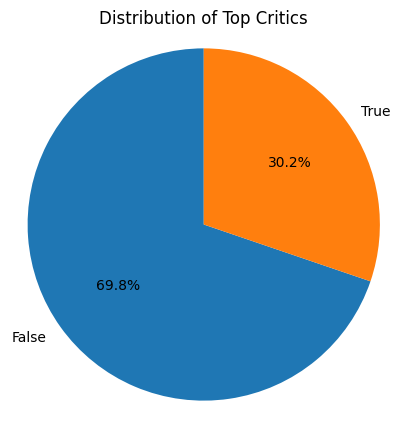

In [186]:
# Plot the pie chart for isTopCritic

# Counting the occurrences of each value in the 'isTopCritic' column
top_critic_counts = reviews['isTopCritic'].value_counts()

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(top_critic_counts, labels=top_critic_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Top Critics')
plt.axis('equal')
plt.show()

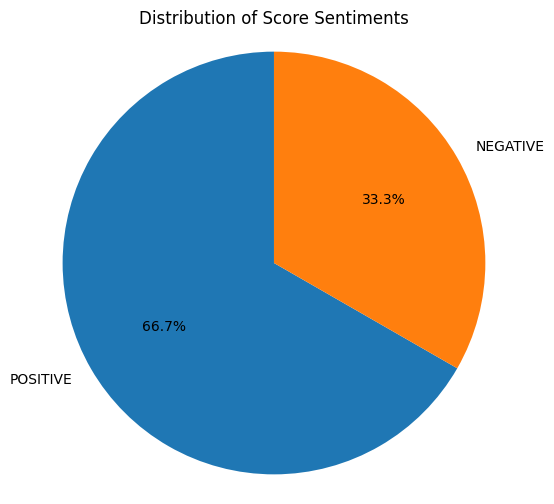

In [187]:
# Plot the pie chart for scoreSentiment

# Counting the occurrences of each value in the 'scoreSentiment' column
score_sentiment_counts = reviews['scoreSentiment'].value_counts()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(score_sentiment_counts, labels=score_sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Score Sentiments')
plt.axis('equal')
plt.show()

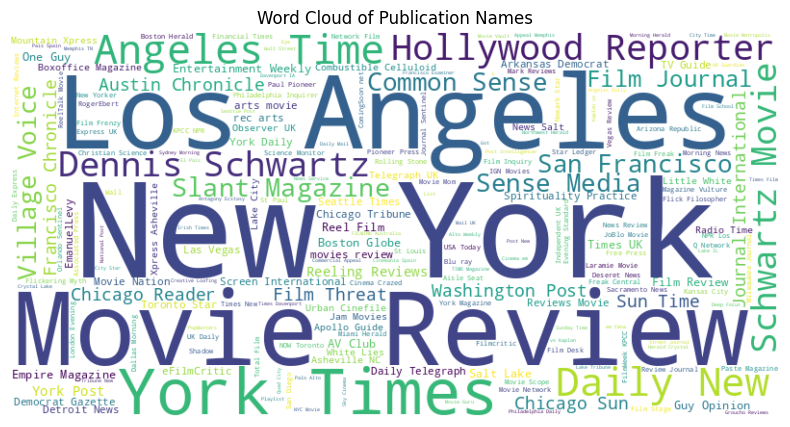

In [188]:
# Create word cloud for publicatioName

# Concatenate all the publication names into a single string
publication_text = ' '.join(reviews['publicatioName'])

# Create a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(publication_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Publication Names')
plt.show()

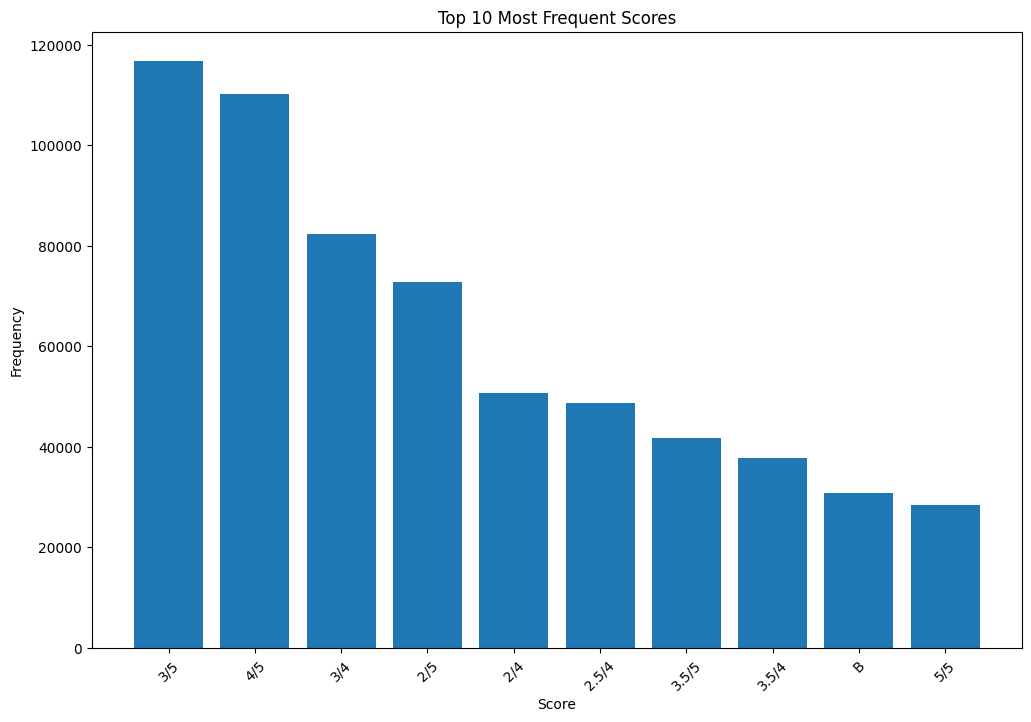

In [189]:
# Create bar chart of originalScore

# Calculate the top 10 most frequent score categories
top_scores = reviews['originalScore'].value_counts().nlargest(10)

# Plot the bar chart
plt.figure(figsize=(12, 8))
plt.bar(top_scores.index, top_scores.values)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Scores')
plt.xticks(rotation=45)
plt.show()

In [190]:
##Bivariate Analysis

# Calculate correlation matrix
corr_matrix = movies.corr()

# Print the correlation matrix
print(corr_matrix)

                audienceScore  tomatoMeter  runtimeMinutes
audienceScore        1.000000     0.602345        0.160563
tomatoMeter          0.602345     1.000000        0.005100
runtimeMinutes       0.160563     0.005100        1.000000


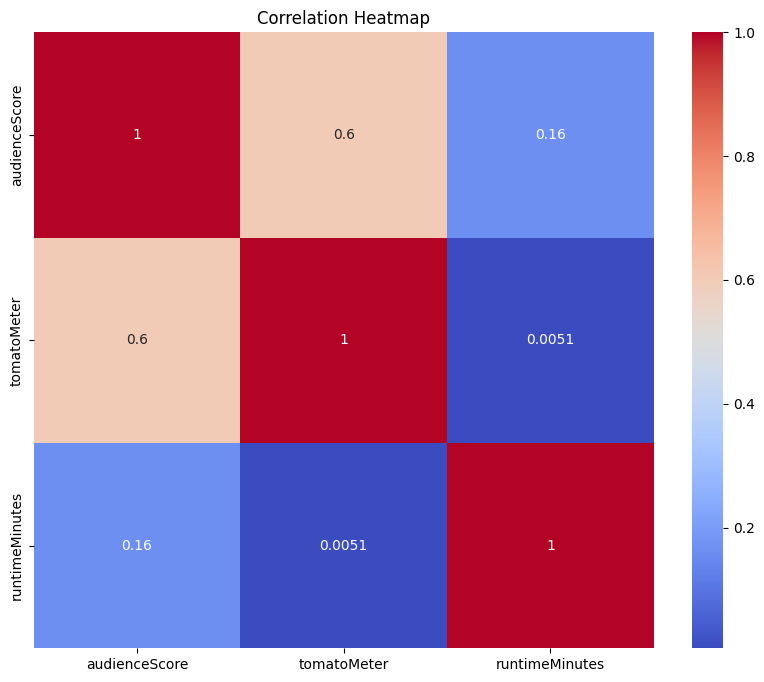

In [191]:
# Get Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

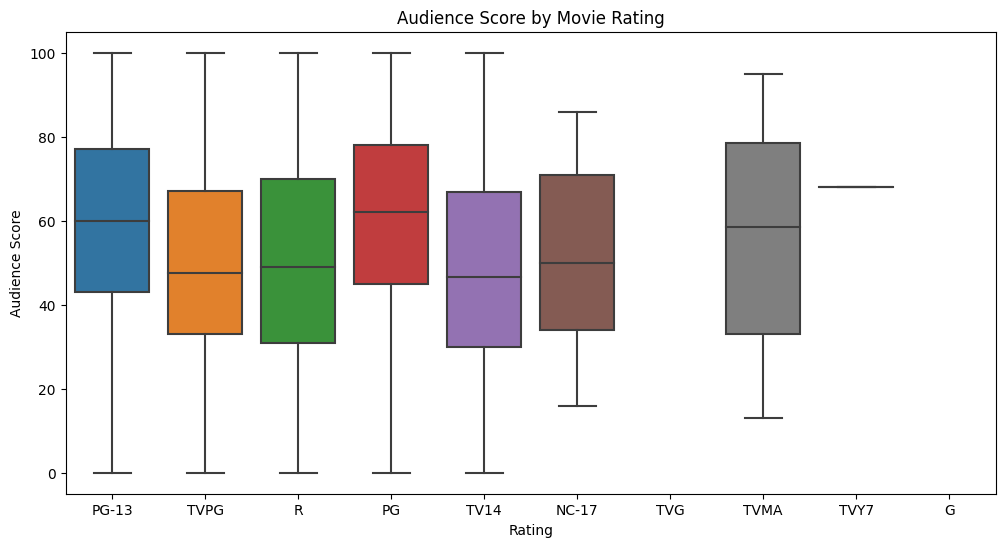

In [192]:
#Audience Score and Movie Rating
plt.figure(figsize=(12,6))
sns.boxplot(x='rating', y='audienceScore', data=movies)
plt.title('Audience Score by Movie Rating')
plt.xlabel('Rating')
plt.ylabel('Audience Score')
plt.show()

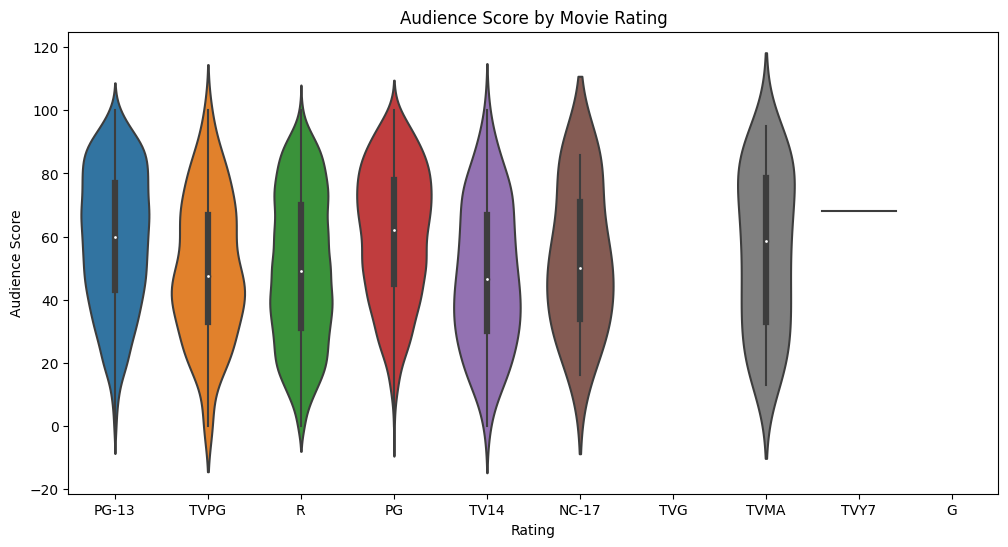

In [193]:
#Audience Score and Movie Rating
plt.figure(figsize=(12,6))
sns.violinplot(x='rating', y='audienceScore', data=movies)
plt.title('Audience Score by Movie Rating')
plt.xlabel('Rating')
plt.ylabel('Audience Score')
plt.show()

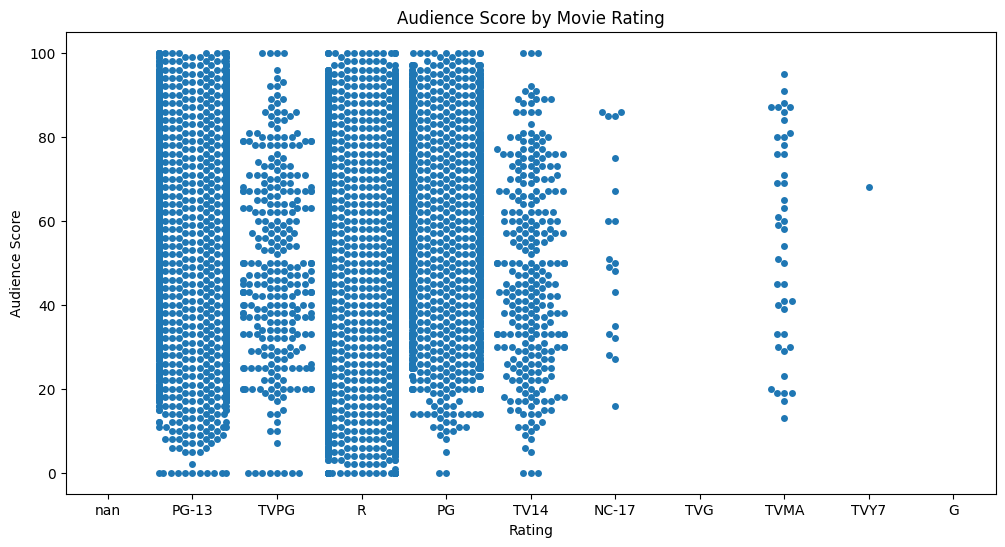

In [194]:
#Audience Score and Movie Rating
plt.figure(figsize=(12,6))
sns.swarmplot(x='rating', y='audienceScore', data=movies)
plt.title('Audience Score by Movie Rating')
plt.xlabel('Rating')
plt.ylabel('Audience Score')
plt.show()

In [195]:
# Combine both datasets based on 'id'
data_combined = pd.merge(movies, reviews, on='id')

# Display 5 rows of combined data
data_combined.head()

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,...,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
0,love_lies,"Love, Lies",43.0,NaN,NaN,NaN,1970-01-01,NaN,120.0,Drama,...,2739073,2020-10-31,James Mudge,False,4/5,fresh,easternKicks.com,Though let down by its routine love triangle n...,POSITIVE,https://www.easternkicks.com/reviews/love-lies
1,love_lies,"Love, Lies",43.0,NaN,NaN,NaN,1970-01-01,NaN,120.0,Drama,...,2333658,2016-06-15,Diva Velez,False,3.5/5,fresh,TheDivaReview.com,"While not perfect, Love, Lies is a worthy disc...",POSITIVE,http://thedivareview.com/Love_Lies_Movie_Revie...
2,adrift_2018,Adrift,65.0,69.0,PG-13,"['Injury Images', 'Brief Drug Use', 'Thematic ...",2018-06-01,2018-08-21,120.0,"Adventure, Drama, Romance",...,102694850,2022-05-29,Josh Parham,False,6/10,fresh,Next Best Picture,This is nowhere near the level of other great ...,POSITIVE,https://www.nextbestpicture.com/adrift.html
3,adrift_2018,Adrift,65.0,69.0,PG-13,"['Injury Images', 'Brief Drug Use', 'Thematic ...",2018-06-01,2018-08-21,120.0,"Adventure, Drama, Romance",...,102654799,2022-02-11,Cory Woodroof,False,NaN,fresh,615 Film,"Adrift somehow survives the late reveal, and t...",POSITIVE,https://615film.wordpress.com/2018/06/07/the-p...
4,adrift_2018,Adrift,65.0,69.0,PG-13,"['Injury Images', 'Brief Drug Use', 'Thematic ...",2018-06-01,2018-08-21,120.0,"Adventure, Drama, Romance",...,2816011,2021-08-21,Kip Mooney,False,C+,rotten,College Movie Review,"For almost the entire runtime, the only people...",NEGATIVE,https://collegemoviereview.com/featured/review...


                audienceScore  tomatoMeter  runtimeMinutes  reviewId  \
audienceScore        1.000000     0.651931        0.249311  0.092883   
tomatoMeter          0.651931     1.000000        0.086697  0.079915   
runtimeMinutes       0.249311     0.086697        1.000000  0.044629   
reviewId             0.092883     0.079915        0.044629  1.000000   
isTopCritic         -0.016158    -0.019197       -0.025668 -0.058104   

                isTopCritic  
audienceScore     -0.016158  
tomatoMeter       -0.019197  
runtimeMinutes    -0.025668  
reviewId          -0.058104  
isTopCritic        1.000000  


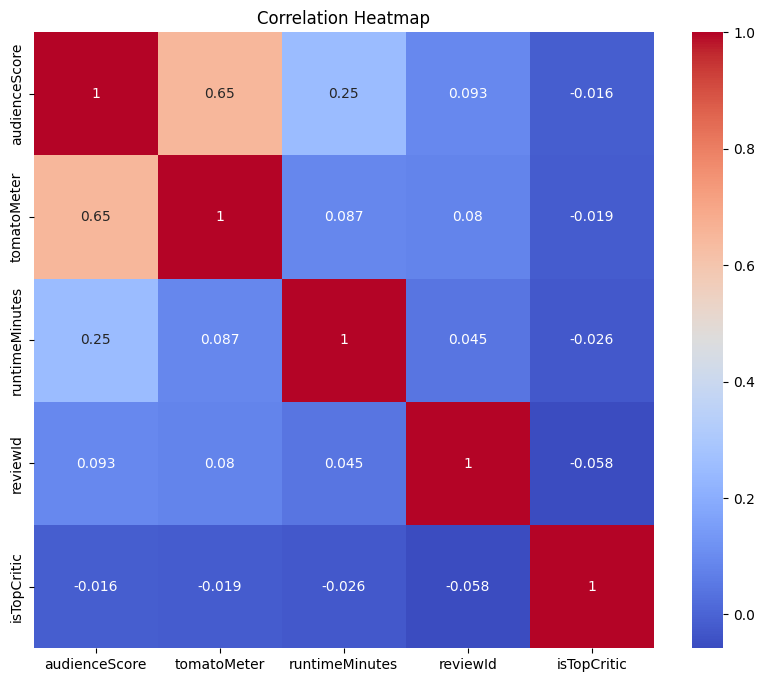

In [196]:
#Combined data correlation using heatmap

# Calculate correlation matrix
corr_matrix = data_combined.corr()

# Print the correlation matrix
print(corr_matrix)

# Draw the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [197]:
##Data Cleaning and Pre-processing

#Drop unwanted columns
columns_to_drop = ['reviewId', 'creationDate', 'reviewUrl']
data_combined = data_combined.drop(columns_to_drop, axis=1)

#Drop rows that have less than 80% non-null values
data_combined.isnull().sum()
data_combined.dropna(thresh=len(movies.columns) * 0.8, inplace=True)

#Filling missing Values for numeric data using mean
data_combined['audienceScore'].fillna(data_combined['audienceScore'].mean(), inplace=True)
data_combined['tomatoMeter'].fillna(data_combined['tomatoMeter'].mean(), inplace=True)
data_combined['runtimeMinutes'].fillna(data_combined['runtimeMinutes'].mean(), inplace=True)

#Filling missing Values for categorical data using mode
data_combined['genre'].fillna(movies['genre'].mode()[0], inplace=True)
data_combined['rating'].fillna(movies['rating'].mode()[0], inplace=True)

#Filling missing Values for categorical data using the absence of information
# Check if the 'Title' column has null values
if data_combined['title'].isna().any():
    # Replace underscores with spaces and capitalize the first letter of each word
    data_combined['title'] = data_combined['id'].str.replace('_', ' ').str.title()

    data_combined['ratingContents'].fillna('Unknown', inplace=True)


In [198]:
#Filling missing Values for categorical data using the absence of information
# Check if the 'Title' column has null values
if data_combined['title'].isna().any():
    # Replace underscores with spaces and capitalize the first letter of each word
    data_combined['title'] = data_combined['id'].str.replace('_', ' ').str.title()

    data_combined['ratingContents'].fillna('Unknown', inplace=True)

In [242]:
# Define a function to convert box office values to numerical format
def convert_box_office(value):
    if isinstance(value, float):
        return value
    value = str(value).replace('$', '')
    if 'K' in value:
        return float(re.sub(r'[^0-9.]', '', value)) * 1000
    elif 'M' in value:
        return float(re.sub(r'[^0-9.]', '', value)) * 1000000
    else:
        return 0

# Apply the conversion function to the 'boxOffice' column
data_combined['boxOffice'] = data_combined['boxOffice'].apply(convert_box_office)

# Replace null values in 'boxOffice' column with 0
data_combined['boxOffice'] =data_combined['boxOffice'].fillna(0)
# Filter out rows where boxOffice is NaN
data_combined =data_combined[pd.to_numeric(data_combined['boxOffice'], errors='coerce').notnull()]
data_combined['boxOffice'] = data_combined['boxOffice'].astype(int)
# Apply log transformation
data_combined['log_boxOffice'] = np.log1p(data_combined['boxOffice'])

In [200]:
def cleaning_originalScores(x):
    x = re.sub(' +', '', x)
    if '/' in x: # rating is numeric, but need to transform it in score out of 10
        numer = float(x[:x.index('/')])
        denom = float(x[x.index('/')+1:])
        if (denom >= numer) and (denom > 0):
            return round(numer * (10 / denom), 2)
        else:
            return np.nan
    else: # rating is non-numeric
        if x == 'A':
            return 10
        elif x == 'A-':
            return 9.25
        elif x == 'B+':
            return 8.25
        elif x == 'B':
            return 7.5
        elif x == 'B-':
            return 6.75
        elif x == 'C+':
            return 5.75
        elif x == 'C':
            return 5
        elif x == 'C-':
            return 4.25
        elif x == 'D+':
            return 3.25
        elif x == 'D':
            return 2.5
        elif x == 'D-':
            return 1.75
        elif x == 'F':
            return 0

pattern = r'^([A-Z][\+-]?|\d+/\d+|\d+\.\d+/\d+(\.\d+)?)$'

data_combined = data_combined[data_combined.originalScore.notnull() & data_combined.originalScore.str.contains(pattern)]
data_combined['originalScore'] = data_combined['originalScore'].apply(cleaning_originalScores)



In [201]:
data_combined['releaseDateTheaters'].fillna('Unknown', inplace=True)
data_combined['releaseDateStreaming'].fillna('Unknown', inplace=True)
data_combined['originalLanguage'].fillna('Unknown', inplace=True)
data_combined['director'].fillna('Unknown', inplace=True)
data_combined['writer'].fillna('Unknown', inplace=True)
data_combined['distributor'].fillna('Unknown', inplace=True)
data_combined['soundMix'].fillna('Unknown', inplace=True)
data_combined['boxOffice'].fillna('Unknown', inplace=True)
data_combined['originalScore'].fillna('Unknown', inplace=True)
data_combined['reviewText'].fillna('Unknown', inplace=True)

In [202]:
#Checking and Dropping the duplicate rows
data_combined.duplicated().sum()
data_combined.drop_duplicates(inplace=True)

In [203]:
data_combined.head(20)

,id,title,audienceScore,tomatoMeter,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,...,boxOffice,distributor,soundMix,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment
0,love_lies,Love Lies,43.0,66.910535,R,Unknown,1970-01-01,Unknown,120.0,Drama,...,Unknown,Unknown,Unknown,James Mudge,False,8.0,fresh,easternKicks.com,Though let down by its routine love triangle n...,POSITIVE
1,love_lies,Love Lies,43.0,66.910535,R,Unknown,1970-01-01,Unknown,120.0,Drama,...,Unknown,Unknown,Unknown,Diva Velez,False,7.0,fresh,TheDivaReview.com,"While not perfect, Love, Lies is a worthy disc...",POSITIVE
2,adrift_2018,Adrift 2018,65.0,69.000000,PG-13,"['Injury Images', 'Brief Drug Use', 'Thematic ...",2018-06-01,2018-08-21,120.0,"Adventure, Drama, Romance",...,$31.4M,STX Films,Unknown,Josh Parham,False,6.0,fresh,Next Best Picture,This is nowhere near the level of other great ...,POSITIVE
4,adrift_2018,Adrift 2018,65.0,69.000000,PG-13,"['Injury Images', 'Brief Drug Use', 'Thematic ...",2018-06-01,2018-08-21,120.0,"Adventure, Drama, Romance",...,$31.4M,STX Films,Unknown,Kip Mooney,False,5.75,rotten,College Movie Review,"For almost the entire runtime, the only people...",NEGATIVE
6,adrift_2018,Adrift 2018,65.0,69.000000,PG-13,"['Injury Images', 'Brief Drug Use', 'Thematic ...",2018-06-01,2018-08-21,120.0,"Adventure, Drama, Romance",...,$31.4M,STX Films,Unknown,Richard Crouse,False,4.0,rotten,Richard Crouse,What is meant to be a voyage of self-discovery...,NEGATIVE
7,adrift_2018,Adrift 2018,65.0,69.000000,PG-13,"['Injury Images', 'Brief Drug Use', 'Thematic ...",2018-06-01,2018-08-21,120.0,"Adventure, Drama, Romance",...,$31.4M,STX Films,Unknown,Tilly Pearce,False,6.0,fresh,metro.co.uk,"Ultimately, Adrift was a nice enough way to pa...",POSITIVE
9,adrift_2018,Adrift 2018,65.0,69.000000,PG-13,"['Injury Images', 'Brief Drug Use', 'Thematic ...",2018-06-01,2018-08-21,120.0,"Adventure, Drama, Romance",...,$31.4M,STX Films,Unknown,Richard Propes,False,6.25,fresh,TheIndependentCritic.com,Woodley is an absolute blast to watch in the f...,POSITIVE
10,adrift_2018,Adrift 2018,65.0,69.000000,PG-13,"['Injury Images', 'Brief Drug Use', 'Thematic ...",2018-06-01,2018-08-21,120.0,"Adventure, Drama, Romance",...,$31.4M,STX Films,Unknown,Jason Fraley,False,6.25,rotten,"WTOP (Washington, D.C.)","The longer we're at sea, we the audience begin...",NEGATIVE
11,adrift_2018,Adrift 2018,65.0,69.000000,PG-13,"['Injury Images', 'Brief Drug Use', 'Thematic ...",2018-06-01,2018-08-21,120.0,"Adventure, Drama, Romance",...,$31.4M,STX Films,Unknown,Zehra Phelan,False,6.0,rotten,Flavourmag,A one-woman crewed voyage of grit and determin...,NEGATIVE
12,adrift_2018,Adrift 2018,65.0,69.000000,PG-13,"['Injury Images', 'Brief Drug Use', 'Thematic ...",2018-06-01,2018-08-21,120.0,"Adventure, Drama, Romance",...,$31.4M,STX Films,Unknown,Tom Beasley,False,6.0,rotten,Flickering Myth,There are two stories playing out almost simul...,NEGATIVE


In [204]:
# Checking outliers
def findoutliers(column):
    outliers=[]
    Q1=column.quantile(.25)
    Q3=column.quantile(.75)
    IQR=Q3-Q1
    lower_limit=Q1-(1.5*IQR)
    upper_limit=Q3+(1.5*IQR)
    for out1 in column:
        if out1>upper_limit or out1 <lower_limit:
            outliers.append(out1)

    return np.array(outliers)

In [205]:
print(len(findoutliers(data_combined.audienceScore)))

727


In [206]:
print(len(findoutliers(data_combined.tomatoMeter)))

0


In [207]:
print(len(findoutliers(data_combined.runtimeMinutes)))

32053


In [208]:
#Removing outliers in 'audienceScore'
Q1 = data_combined['audienceScore'].quantile(0.25)
Q3 = data_combined['audienceScore'].quantile(0.75)
IQR = Q3 - Q1

In [209]:
lower_bound = Q1 - 1.5 * IQR+10
upper_bound = Q3 + 1.5 * IQR-10

In [210]:
data_combined = data_combined[(data_combined['audienceScore'] >= lower_bound) & (data_combined['audienceScore'] <= upper_bound)]

<Axes: xlabel='audienceScore'>

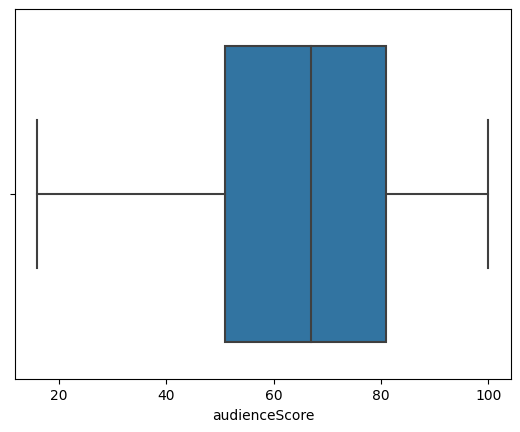

In [211]:
sns.boxplot(x=data_combined['audienceScore'])

In [212]:
#Removing outliers in 'runtimeMinutes'
Q1 = data_combined['runtimeMinutes'].quantile(0.25)
Q3 = data_combined['runtimeMinutes'].quantile(0.75)
IQR = Q3 - Q1

In [213]:
lower_bound = Q1 - 1.5 * IQR+10
upper_bound = Q3 + 1.5 * IQR-10

In [214]:
data_combined = data_combined[(data_combined['runtimeMinutes'] >= lower_bound) & (data_combined['runtimeMinutes'] <= upper_bound)]

<Axes: xlabel='runtimeMinutes'>

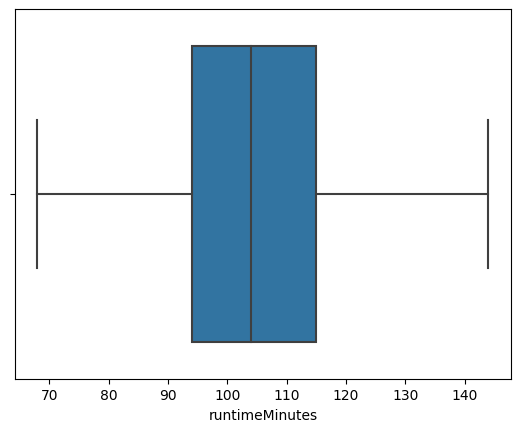

In [215]:
sns.boxplot(x=data_combined['runtimeMinutes'])

In [216]:
print(len(findoutliers(data_combined.runtimeMinutes)))

0


In [217]:
#Label-Encoder encoding for categorical variables

In [218]:
from sklearn.preprocessing import LabelEncoder

# Create the encoder
encoder = LabelEncoder()

In [219]:
# Fit and transform the encoder on 'genre' column
data_combined['genre'] = encoder.fit_transform(data_combined['genre'])
data_combined['genre']

0           800
1           800
2           299
4           299
6           299
           ... 
1469518    1138
1469519    1138
1469521    1138
1469523     191
1469524     191
Name: genre, Length: 929220, dtype: int64

In [220]:
# Fit and transform the encoder on 'originalLanguage' column
data_combined['originalLanguage'] = encoder.fit_transform(data_combined['originalLanguage'])
data_combined['originalLanguage']

0          48
1          48
2          21
4          21
6          21
           ..
1469518    21
1469519    21
1469521    21
1469523    36
1469524    36
Name: originalLanguage, Length: 929220, dtype: int64

In [221]:
# Fit and transform the encoder on 'director' column
data_combined['director'] = encoder.fit_transform(data_combined['director'])
data_combined['director']

0          18721
1          18721
2           2268
4           2268
6           2268
           ...  
1469518    12675
1469519    12675
1469521    12675
1469523    15370
1469524    15370
Name: director, Length: 929220, dtype: int64

In [222]:
# Fit and transform the encoder on 'writer' column
data_combined['writer'] = encoder.fit_transform(data_combined['writer'])
data_combined['writer']

0          10590
1          10590
2             86
4             86
6             86
           ...  
1469518    19427
1469519    19427
1469521    19427
1469523    25661
1469524    25661
Name: writer, Length: 929220, dtype: int64

In [223]:
# Fit and transform the encoder on 'distributor' column
data_combined['distributor'] = encoder.fit_transform(data_combined['distributor'])
data_combined['distributor']

0          2675
1          2675
2          2182
4          2182
6          2182
           ... 
1469518    1903
1469519    1903
1469521    1903
1469523    2675
1469524    2675
Name: distributor, Length: 929220, dtype: int64

In [224]:
# Fit and transform the encoder on 'soundMix' column
data_combined['soundMix'] = encoder.fit_transform(data_combined['soundMix'])
data_combined['soundMix']

0          503
1          503
2          503
4          503
6          503
          ... 
1469518     44
1469519     44
1469521     44
1469523    503
1469524    503
Name: soundMix, Length: 929220, dtype: int64

In [225]:
data_combined['originalScore'].replace("Unknown", 0, inplace=True)

In [ ]:
data_combined['originalScore'].replace("Unknown", 0, inplace=True)

In [226]:
# Fit and transform the encoder on 'originalScore' column
data_combined['originalScore'] = encoder.fit_transform(data_combined['originalScore'])
data_combined['originalScore']

0          328
1          269
2          218
4          199
6           99
          ... 
1469518    299
1469519     91
1469521     74
1469523     99
1469524     99
Name: originalScore, Length: 929220, dtype: int64

In [227]:
# Fit and transform the encoder on 'rating' column
data_combined['rating'] = encoder.fit_transform(data_combined['rating'])
data_combined['rating']

0          3
1          3
2          2
4          2
6          2
          ..
1469518    2
1469519    2
1469521    2
1469523    3
1469524    3
Name: rating, Length: 929220, dtype: int64

In [228]:
# Fit and transform the encoder on 'ratingContents' column
data_combined['ratingContents'] = encoder.fit_transform(data_combined['ratingContents'])
data_combined['ratingContents']

0             0
1             0
2          1444
4          1444
6          1444
           ... 
1469518    2161
1469519    2161
1469521    2161
1469523       0
1469524       0
Name: ratingContents, Length: 929220, dtype: int64

In [229]:
# Fit and transform the encoder on 'criticName' column
data_combined['criticName'] = encoder.fit_transform(data_combined['criticName'])
data_combined['criticName']

0          3452
1          2304
2          4240
4          4676
6          6781
           ... 
1469518    1526
1469519    5536
1469521    3669
1469523    2265
1469524    6657
Name: criticName, Length: 929220, dtype: int64

In [230]:
# Fit and transform the encoder on 'isTopCritic' column
data_combined['isTopCritic'] = data_combined['isTopCritic'].map({'True': True, 'False': False})
data_combined['isTopCritic']

0          NaN
1          NaN
2          NaN
4          NaN
6          NaN
          ... 
1469518    NaN
1469519    NaN
1469521    NaN
1469523    NaN
1469524    NaN
Name: isTopCritic, Length: 929220, dtype: object

In [231]:
# Fit and transform the encoder on 'reviewState' column
data_combined['reviewState'] = encoder.fit_transform(data_combined['reviewState'])
data_combined['reviewState']

0          0
1          0
2          0
4          1
6          1
          ..
1469518    0
1469519    1
1469521    1
1469523    1
1469524    1
Name: reviewState, Length: 929220, dtype: int64

In [232]:
# Fit and transform the encoder on 'publicatioName' column
data_combined['publicatioName'] = encoder.fit_transform(data_combined['publicatioName'])
data_combined['publicatioName']

0          1903
1          1710
2          1157
4           352
6          1329
           ... 
1469518    1482
1469519    1299
1469521     521
1469523     618
1469524    1690
Name: publicatioName, Length: 929220, dtype: int64

In [233]:
# Fit and transform the encoder on 'scoreSentiment' column
data_combined['scoreSentiment'] = encoder.fit_transform(data_combined['scoreSentiment'])
data_combined['scoreSentiment']

0          1
1          1
2          1
4          0
6          0
          ..
1469518    1
1469519    0
1469521    0
1469523    0
1469524    0
Name: scoreSentiment, Length: 929220, dtype: int64

In [234]:
#MinMaxScaler normalization for numerical variables

In [235]:
# Importing necessary libraries
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Creating MinMaxScaler (Normalization)
min_max_scaler = MinMaxScaler()

In [236]:
# Applying MinMaxScaler on 'audienceScore'
data_combined['audienceScore'] = min_max_scaler.fit_transform(data_combined[['audienceScore']])

In [237]:
# Applying MinMaxScaler on 'tomatoMeter'
data_combined['tomatoMeter'] = min_max_scaler.fit_transform(data_combined[['tomatoMeter']])

In [238]:
# Applying MinMaxScaler on 'runtimeMinutes'
data_combined['runtimeMinutes'] = min_max_scaler.fit_transform(data_combined[['runtimeMinutes']])

In [239]:
data_combined.columns

Index(['id', 'title', 'audienceScore', 'tomatoMeter', 'rating',
       'ratingContents', 'releaseDateTheaters', 'releaseDateStreaming',
       'runtimeMinutes', 'genre', 'originalLanguage', 'director', 'writer',
       'boxOffice', 'distributor', 'soundMix', 'criticName', 'isTopCritic',
       'originalScore', 'reviewState', 'publicatioName', 'reviewText',
       'scoreSentiment'],
      dtype='object')

In [243]:
# Applying MinMaxScaler on 'boxOffice'
data_combined['log_boxOffice'] = min_max_scaler.fit_transform(data_combined[['log_boxOffice']])

In [244]:
#TF-IDF to convert 'reviewText' text data into numerical vectors that capture semantic meaning

In [245]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=100)

# Fit and transform the vectorizer on 'reviewText'
tfidf_matrix = tfidf_vectorizer.fit_transform(data_combined['reviewText'])

# Convert the TF-IDF matrix into a DataFrame
#tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names())

# Add the TF-IDF columns to the original DataFrame
#data_combined = pd.concat([data_combined, tfidf_df], axis=1)

#tfidf_df

In [246]:
data_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 929220 entries, 0 to 1469524
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    929220 non-null  object        
 1   title                 929220 non-null  object        
 2   audienceScore         929220 non-null  float64       
 3   tomatoMeter           929220 non-null  float64       
 4   rating                929220 non-null  int64         
 5   ratingContents        929220 non-null  int64         
 6   releaseDateTheaters   929220 non-null  datetime64[ns]
 7   releaseDateStreaming  929220 non-null  object        
 8   runtimeMinutes        929220 non-null  float64       
 9   genre                 929220 non-null  int64         
 10  originalLanguage      929220 non-null  int64         
 11  director              929220 non-null  int64         
 12  writer                929220 non-null  int64         
 13

In [247]:
sampled_data = data_combined.sample(frac=0.01)

In [248]:
sampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9292 entries, 1187623 to 635819
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9292 non-null   object        
 1   title                 9292 non-null   object        
 2   audienceScore         9292 non-null   float64       
 3   tomatoMeter           9292 non-null   float64       
 4   rating                9292 non-null   int64         
 5   ratingContents        9292 non-null   int64         
 6   releaseDateTheaters   9292 non-null   datetime64[ns]
 7   releaseDateStreaming  9292 non-null   object        
 8   runtimeMinutes        9292 non-null   float64       
 9   genre                 9292 non-null   int64         
 10  originalLanguage      9292 non-null   int64         
 11  director              9292 non-null   int64         
 12  writer                9292 non-null   int64         
 13  boxOffice 

In [249]:
#Using the Approximate Nearest Neighbors (ANN) algorithm for calculating cosine similarity

In [250]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the 'reviewText' column to obtain TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(data_combined['reviewText'])

# Initialize the ANN algorithm with cosine similarity metric
ann_model = NearestNeighbors(metric='cosine')

# Fit the ANN model on the TF-IDF matrix
ann_model.fit(tfidf_matrix)

def get_recommendations(title, ann_model=ann_model):
    # Get the index of the movie that matches the title
    idx = data_combined[data_combined['title'] == title].index[0]

    # Find the nearest neighbors based on cosine similarity
    distances, indices = ann_model.kneighbors(tfidf_matrix[idx], n_neighbors=11)

    # Get the movie indices excluding the input movie itself
    movie_indices = indices[0, 1:]

    # Return the titles of the most similar movies
    return data_combined.iloc[movie_indices]['title']

In [251]:
print(data_combined['title'].unique())

['Love Lies' 'Adrift 2018' '1035316-Born To Kill' ...
 'Stag Night Of The Dead' 'Fun Size' 'Dassehra']


In [252]:
print(get_recommendations('Adrift 2018'))

1185607             Gun-Chung-Eye-In-The-Sky
62860                            Air Buddies
1297107                         Edge Of Doom
1369483             Pinocchio In Outer Space
1357286    Train To Busan Presents Peninsula
76529          The Worst Person In The World
16155                             Dumbo 2019
797493                         Low Tide 2018
1004813                        The Walk 2015
1035152                       50 First Dates
Name: title, dtype: object


In [253]:
def evaluate_model(recommendations, ground_truth):
    """
    Evaluate the performance of the movie recommendation model.

    Parameters:
    - recommendations: List of recommended movies
    - ground_truth: List of actual relevant movies

    Returns:
    - precision: Precision value
    - recall: Recall value
    """
    # Calculate the number of correctly recommended movies
    correct_recommendations = set(recommendations).intersection(set(ground_truth))

    # Calculate precision
    precision = len(correct_recommendations) / len(recommendations)

    # Calculate recall
    recall = len(correct_recommendations) / len(ground_truth)

    return precision, recall


ground_truth = ['Narc', 'Air Buddies', 'Eye in the Sky']
recommendations = get_recommendations('Adrift 2018')

precision, recall = evaluate_model(recommendations, ground_truth)
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Precision: 0.1
Recall: 0.3333333333333333


In [254]:
from sklearn.metrics.pairwise import cosine_similarity

# Reset index of sampled_data
df_reset = sampled_data.reset_index(drop=True)

# Create a new DataFrame with only the features we're interested in
features = ['genre', 'director']
feature_df = sampled_data[features]

# Compute the cosine similarity matrix from the feature_df
cosine_sim_reset = cosine_similarity(feature_df, feature_df)

# Construct a reverse map of indices and movie titles
indices_reset = pd.Series(df_reset.index, index=df_reset['title']).drop_duplicates()

import numpy as np

def get_recommendations(title, cosine_sim=cosine_sim_reset):
    # Get the index of the movie that matches the title
    idx = indices_reset[title]

    # Get the pairwise similarity scores of all movies with that movie
    sim_scores = cosine_sim[idx]

    # Get the indices of the movies sorted by similarity
    movie_indices = sim_scores.argsort()[::-1]

    # Get the indices of the 10 most similar movies
    movie_indices = movie_indices[1:11]

    # Flatten the movie_indices array
    movie_indices = np.ravel(movie_indices)

    # Check if there are out of bounds indices
    print("Max index: ", max(movie_indices))
    print("Number of rows: ", df_reset.shape[0])

    # Return the top 10 most similar movies
    return df_reset['title'].iloc[movie_indices]

In [255]:
print(df_reset['title'].unique())

['Jackass Forever' 'The Argument' 'Diner' ... 'Proposition'
 'Scatter My Ashes At Bergdorfs' 'Unconditional 2012']


In [256]:
print(get_recommendations('Bratz The Movie'))

Max index:  8273
Number of rows:  9292
8273                   Heartbreak Kid
2547               10011984-Last Song
3008    Memoirs Of My Nervous Illness
684                          Bookwars
64         The Birth Of A Nation 2016
1183       The Birth Of A Nation 2016
144        The Birth Of A Nation 2016
2982                       21 Bridges
3128                            Trans
1302          You Were Never Lovelier
Name: title, dtype: object
